In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pdb
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [3]:
def get_data_classes(path):
    all_images_as_array=[]
    label=[]
    # pdb.set_trace()
    for filename in os.listdir(path):
        try:
            if re.match(r'ELBOWnegative',filename):
                label.append(0)
            elif re.match(r'ELBOWpositive',filename):
                label.append(1)
            elif re.match(r'FINGERnegative',filename):
                label.append(2)
            elif re.match(r'FINGERpositive',filename):
                label.append(3)
            elif re.match(r'FOREARMnegative',filename):
                label.append(4)
            elif re.match(r'FOREARMpositive',filename):
                label.append(5)
            elif re.match(r'HANDnegative',filename):
                label.append(6)
            elif re.match(r'HANDpositive',filename):
                label.append(7)
            elif re.match(r'HUMERUSnegative',filename):
                label.append(8)
            elif re.match(r'HUMERUSpositive',filename):
                label.append(9)
            elif re.match(r'SHOULDERnegative',filename):
                label.append(10)
            elif re.match(r'SHOULDERpositive',filename):
                label.append(11)
            elif re.match(r'WRISTnegative',filename):
                label.append(12)
            elif re.match(r'WRISTpositive',filename):
                label.append(13)
            img=cv2.imread(path + filename)
            (b, g, r)=cv2.split(img)
            img=cv2.merge([r,g,b])
            np_array = np.asarray(img)
            l,b,c = np_array.shape
            np_array = np_array.reshape(l*b*c,)
            all_images_as_array.append(np_array)
        except:
            continue
    return np.array(all_images_as_array), np.array(label)

In [14]:
# Utility function to visualize the outputs of PCA and t-SNE

def scatter_pca(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []
    # pdb.set_trace()
    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [5]:
# # create training data
train_data = "data/train_images/PCA/all/"
X_train, y_train = get_data_classes(train_data)

time_start = time.time()

x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

In [6]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [7]:
pca_tsne = TSNE(random_state=RS, verbose=1).fit_transform(pca_result_50)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.029s...
[t-SNE] Computed neighbors for 20000 samples in 14.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

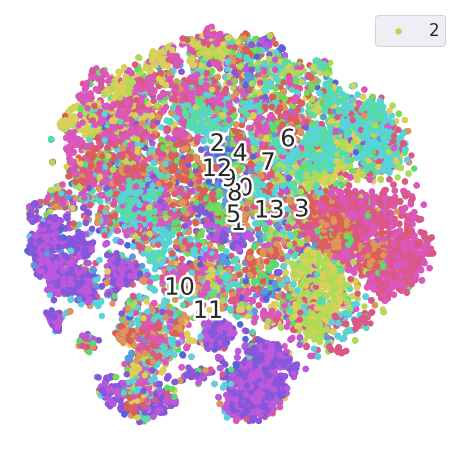

In [22]:
labels = np.arange(14)
scatter_pca(pca_tsne, y_subset)
plt.legend([0,1,2])

In [9]:
tsne_df = pd.DataFrame(columns = ['pca1','pca2','pca3'])

tsne_df['pca1'] = pca_result_50[:,0]
tsne_df['pca2'] = pca_result_50[:,1]
tsne_df['pca3'] = pca_result_50[:,2]

No handles with labels found to put in legend.


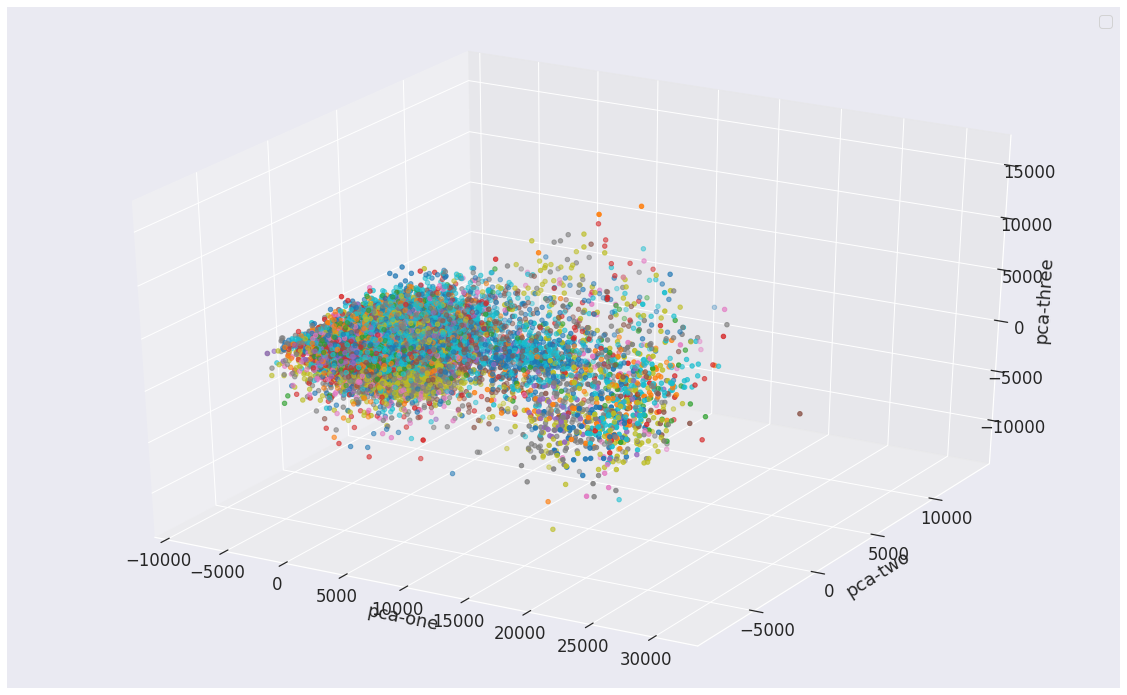

In [11]:
#3d plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne_df["pca1"], 
    ys=tsne_df["pca2"], 
    zs=tsne_df["pca3"], 
    c=y_subset, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.legend()
plt.tight_layout()
# plt.savefig('3d_tsne_all_classes_subset.png')